# Bike Sharing Case Study
### Overview

Through a paid or free service, people can borrow bikes for short periods of time from other people using a bike-sharing system. Numerous bike share programs enable users to check out bikes from "docks," which are often computerized locations where users input payment details and the system unlocks the bike. After that, you can return this bike to any other dock in the system.

The ongoing Corona outbreak has caused significant drops in revenue for US bike-sharing company BoomBikes. The current state of the market is making it extremely difficult for the organization to survive. In this Regards, BoomBikes hopes to comprehend the need for shared bikes among the populace after the country's Covid-19-related quarantine lifts. In order to differentiate themselves from other service providers and generate significant profits, they have planned this in order to be ready to meet people's requirements when things improve overall.

To ascertain the variables influencing the demand for these shared bikes, they have hired a consultancy firm. Their specific goal is to comprehend the variables that influence the demand in the US market for these shared bikes. The business is curious about, Which factors matter when forecasting the need for shared bikes and  How well such factors capture the needs for bikes.

### Requiremnt
- The company wants to know:
    - Which variables are significant in predicting the demand for shared bikes.
    - How well those variables describe the bike demands.
    
Required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

#import libraries for analysis and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# importing statsmodel and sklearn libraries for Linear regression model building
import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# importing the RFE for feature Selection; 
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

# importing statsmodels to add constant/intercept.
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
dpath = 'day.csv'
dfbks = pd.read_csv(dpath)

In [3]:
dfbks.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

## Read Data Details 
- Transform the columns for readibility

In [4]:
# shape of the dataframe
dfbks.shape

(730, 16)

In [5]:
#Checking for NULL values in data
null_1=dfbks.isnull().sum()/730*100
null_1.sort_values()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [6]:
dfbks.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

In [7]:
# bike information
dfbks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
#checking numerical columns statistics
dfbks.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [9]:
# renaming columns for better visibility
dfbks.rename(columns={'yr':'year','mnth':'month','hum':'humidity',
                     'weathersit':'weather','cnt':'count'}, inplace=True)

In [10]:
#checking all the columns
dfbks.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

In [11]:
# Check for any duplicate entries
dfbks.duplicated().sum()

0

In [12]:
# creating new df by removing uneccessary/extra columns and assigning new dataframe bkal with remaining columns

c_cols = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather', 'temp', 'atemp', 
            'humidity', 'windspeed','count']

bkal = dfbks[c_cols]
bkal.head()

season  year  month  holiday  weekday  workingday  weather       temp  \
0       1     0      1        0        6           0        2  14.110847   
1       1     0      1        0        0           0        2  14.902598   
2       1     0      1        0        1           1        1   8.050924   
3       1     0      1        0        2           1        1   8.200000   
4       1     0      1        0        3           1        1   9.305237   

      atemp  humidity  windspeed  count  
0  18.18125   80.5833  10.749882    985  
1  17.68695   69.6087  16.652113    801  
2   9.47025   43.7273  16.636703   1349  
3  10.60610   59.0435  10.739832   1562  
4  11.46350   43.6957  12.522300   1600

As observerd, all the columns are of numerical type, but from the data dictionary we see that there are some columns which represents categorical data as well.

- Binary Types : Year, holiday, workingday
- Categorical Types: Season, Month, weekday, Weather
- Numeric types: temp, atemp, Humidity, windspeed, Count

In [13]:
# mapping proper names for binary and categorical variables for better visibilty as per data dictionary
# season (1:spring, 2:summer, 3:autumn, 4:winter)
bkal['season'] = bkal['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

#yr : year (0: 2018, 1:2019)
bkal['year'] = bkal['year'].map({0:'2018',1:'2019'})

# mnth : month ( 1 to 12)
bkal['month'] = bkal['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',
                                       5:'May',6:'June',7:'July',8:'Aug',
                                       9:'Sept',10:'Oct',11:'Nov',12:'Dec'})

#weekday : day of the week
bkal['weekday'] = bkal['weekday'].map({0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})

#workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
bkal['workingday'] = bkal['workingday'].map({0:'No',1:'Yes'})

#holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
bkal['holiday'] = bkal['holiday'].map({0:'No',1:'Yes'})


#weathersit : 
# 1: Clear, Few clouds, Partly cloudy   = Good/Clear
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist = Moderate/Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  = Bad/Light Rain
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog = Worse/Heavy Rain

bkal['weather'] = bkal['weather'].map({1:"Clear",2:'Misty',3:'LightRain',4:'HeavyRain'})

bk_aldf=bkal


## Exploratory Data Anlysis
#### Data Visualisation


In [14]:
# Defining categorical and numerical columns in the dataset
cat_vars = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather']
num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

In [15]:
bk_aldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    object 
 2   month       730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weather     730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


## Visualising the Data

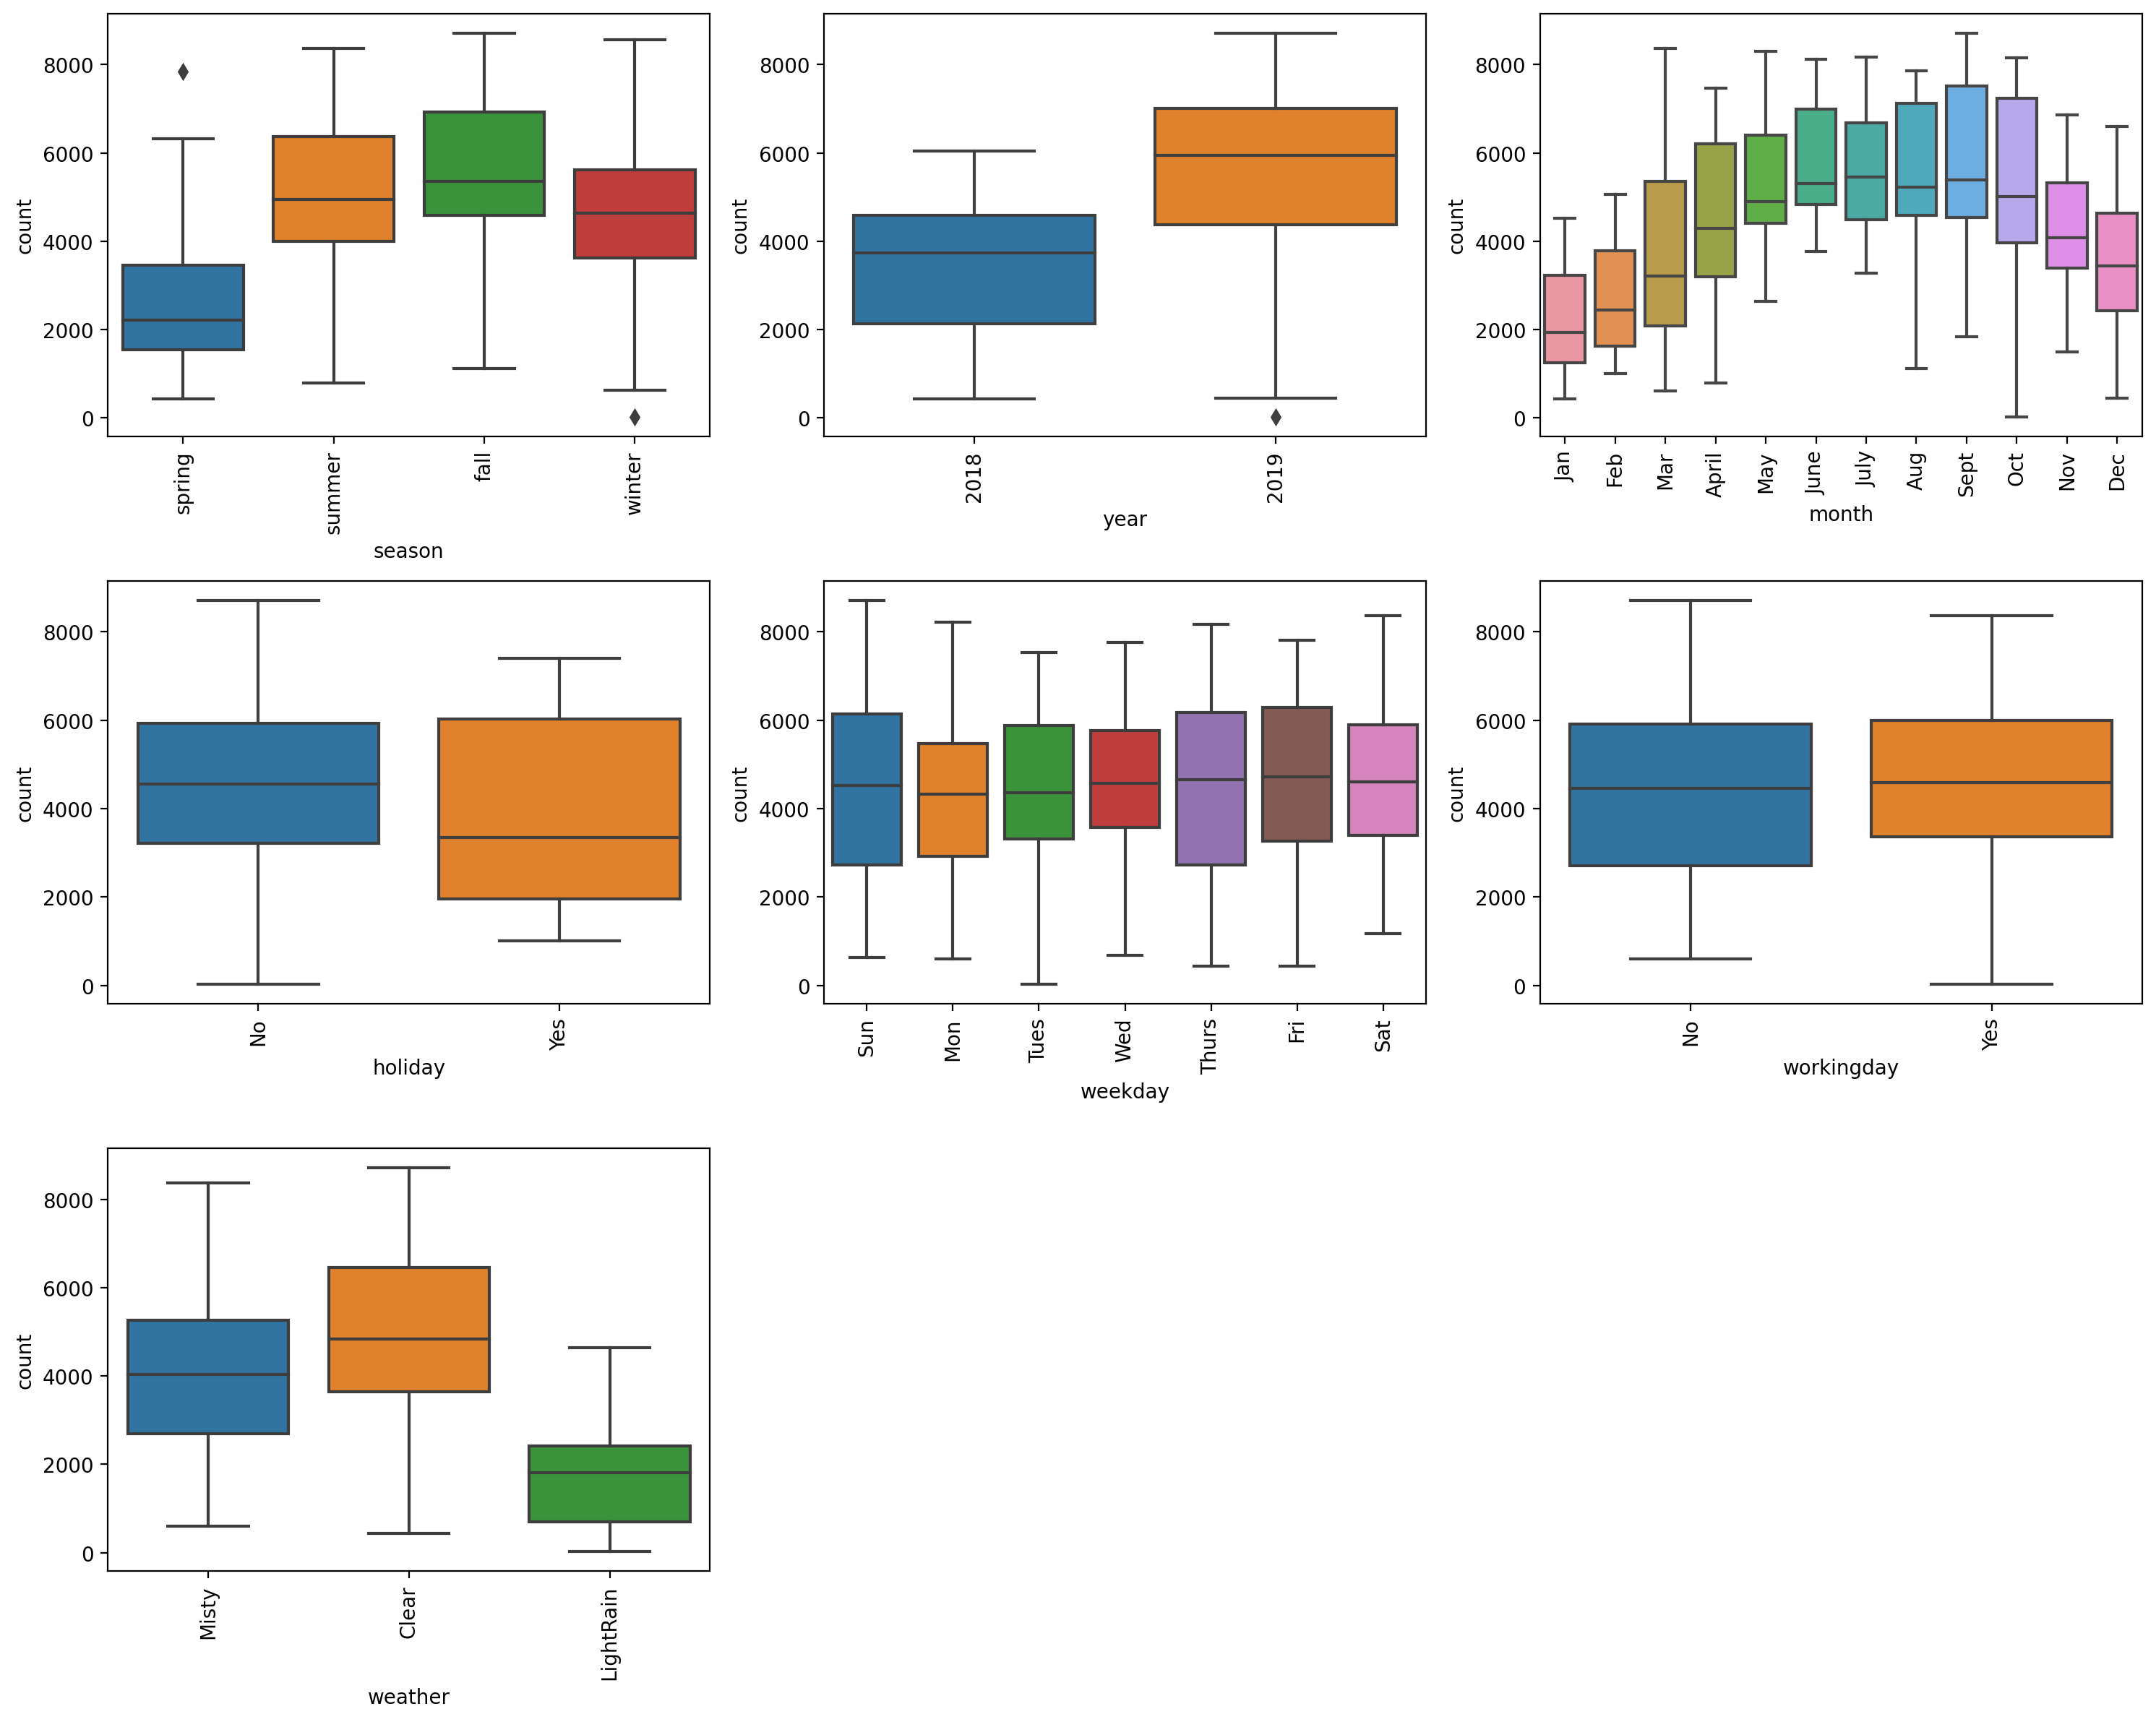

In [16]:
# Box plot for categorical variables
col = 3
row = len(cat_vars)//col+1

plt.figure(figsize=(15,12))
for i in list(enumerate(cat_vars)):
    plt.subplot(row,col,i[0]+1)
    sns.boxplot(x = i[1], y = 'count', data = bkal)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1)    
plt.show()


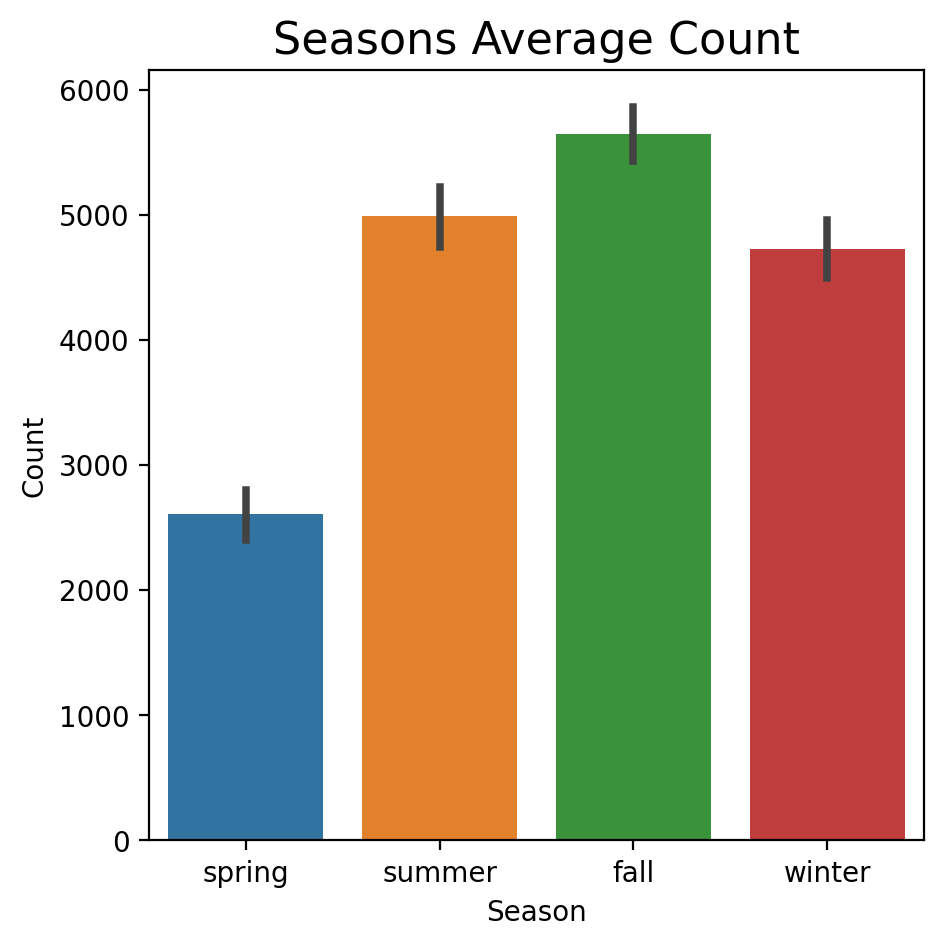

In [17]:
# Visualising Seasons count of rented bikes

plt.figure(figsize=[5,5])
sns.barplot(x=bk_aldf['season'],y=bk_aldf['count'])
plt.title('Seasons Average Count', fontsize = 16)
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

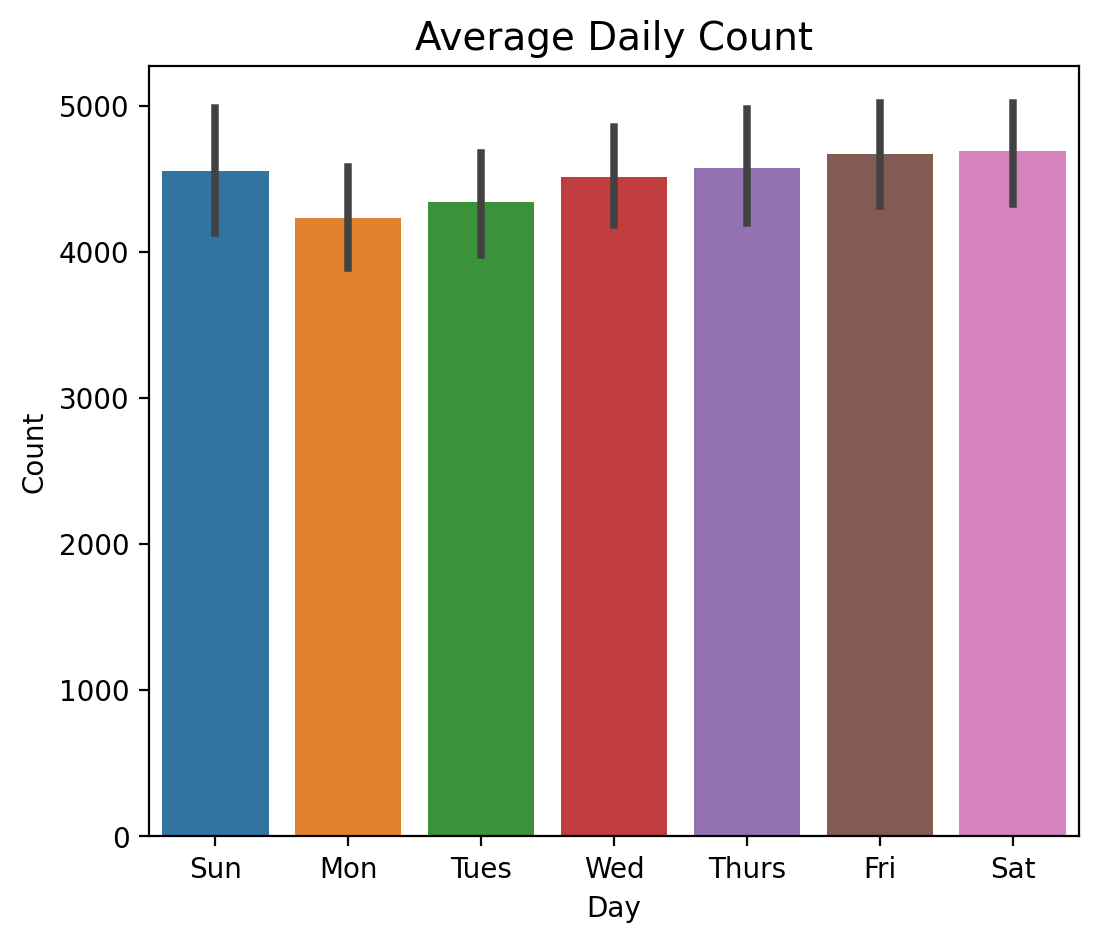

In [18]:
plt.figure(figsize=[6,5])
sns.barplot(x=bk_aldf['weekday'],y=bk_aldf['count'])
plt.title('Average Daily Count', fontsize = 14)
plt.xlabel("Day")
plt.ylabel("Count")
plt.show()

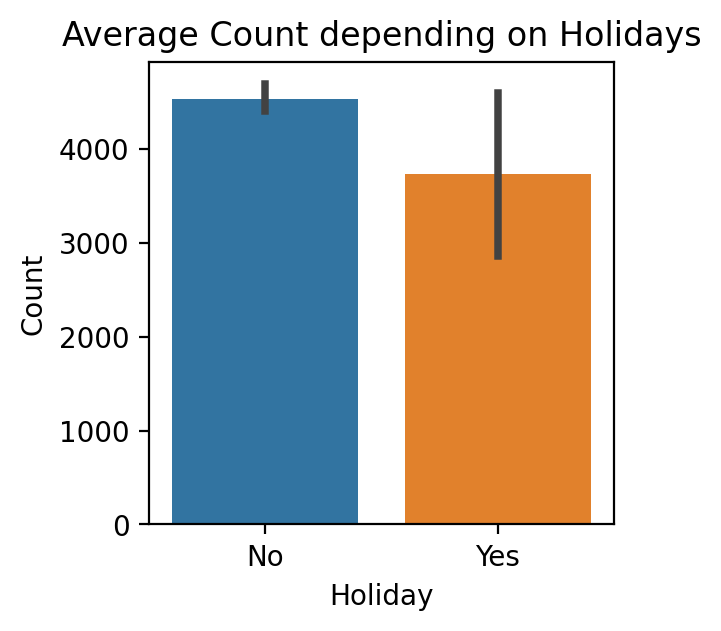

In [19]:
# Visualising Holiday wise count of rented bikes

plt.figure(figsize=[3,3])
sns.barplot(x=bk_aldf['holiday'],y=bk_aldf['count'])
plt.title('Average Count depending on Holidays', fontsize =12)
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.show()

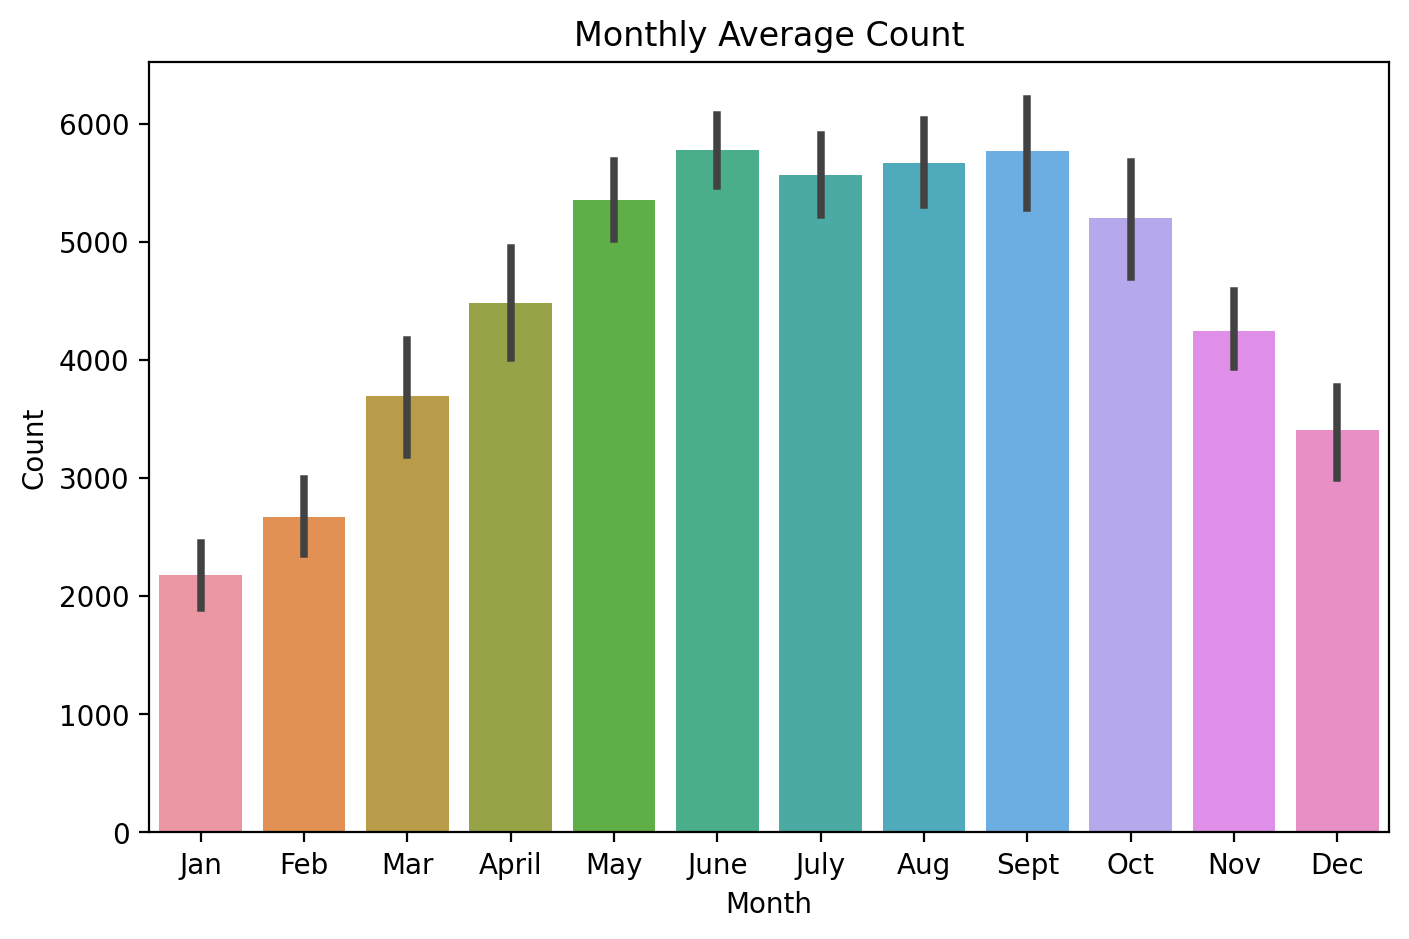

In [20]:
plt.figure(figsize=[8,5])
sns.barplot(x=bk_aldf['month'],y=bk_aldf['count'])
plt.title('Monthly Average Count', fontsize = 12)
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

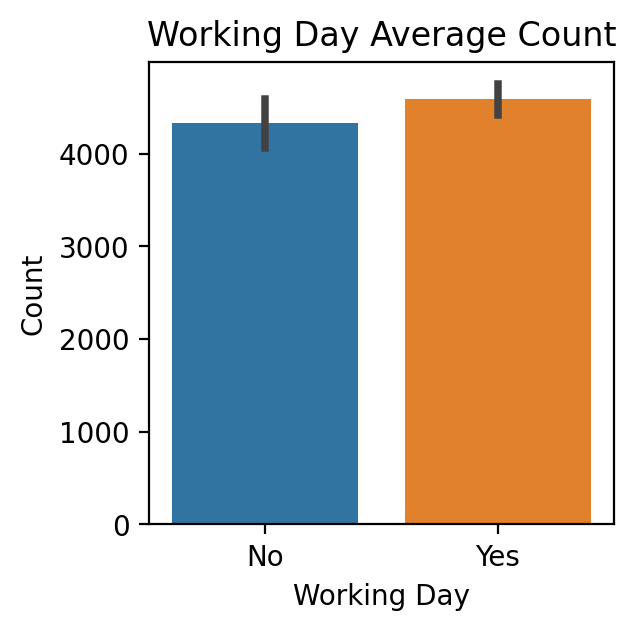

In [21]:
plt.figure(figsize=[3,3])
sns.barplot(x=bk_aldf['workingday'],y=bk_aldf['count'])
plt.title('Working Day Average Count', fontsize = 12)
plt.xlabel('Working Day')
plt.ylabel('Count')
plt.show()

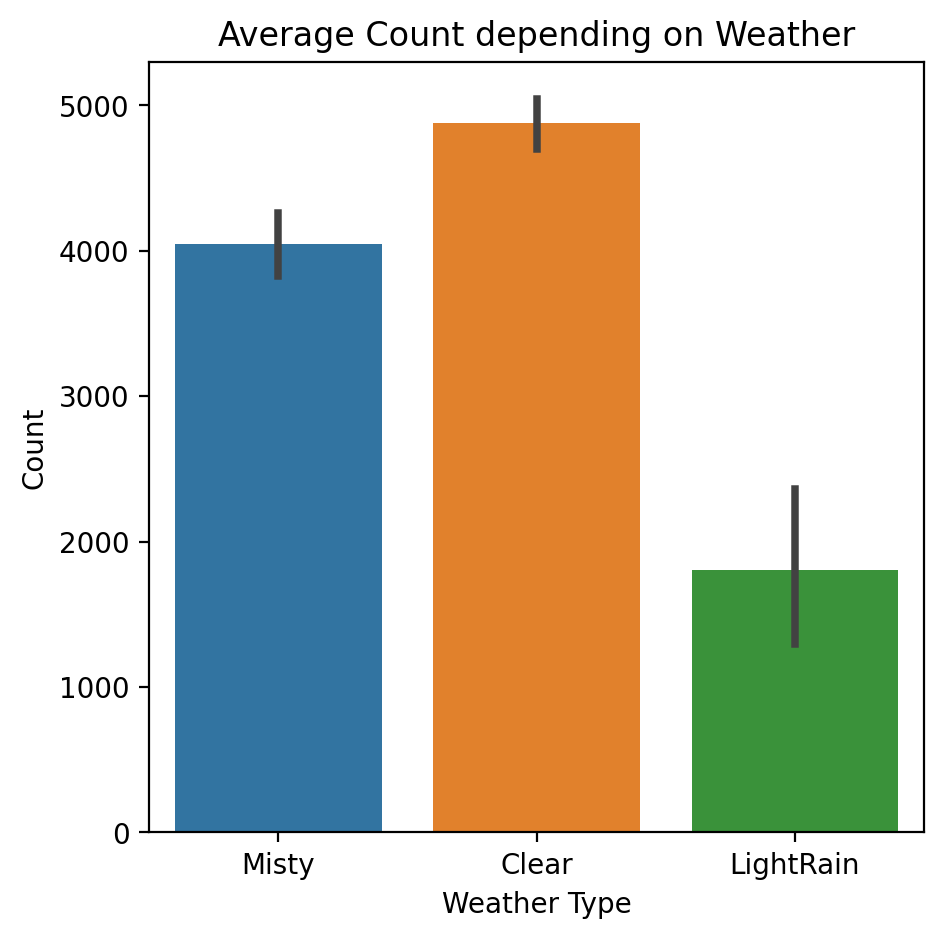

In [22]:
plt.figure(figsize=[5,5])
sns.barplot(x=bk_aldf['weather'],y=bk_aldf['count'])
plt.title('Average Count depending on Weather', fontsize =12)
plt.xlabel('Weather Type')
plt.ylabel('Count')
plt.show()

### Numerical Data Visualization

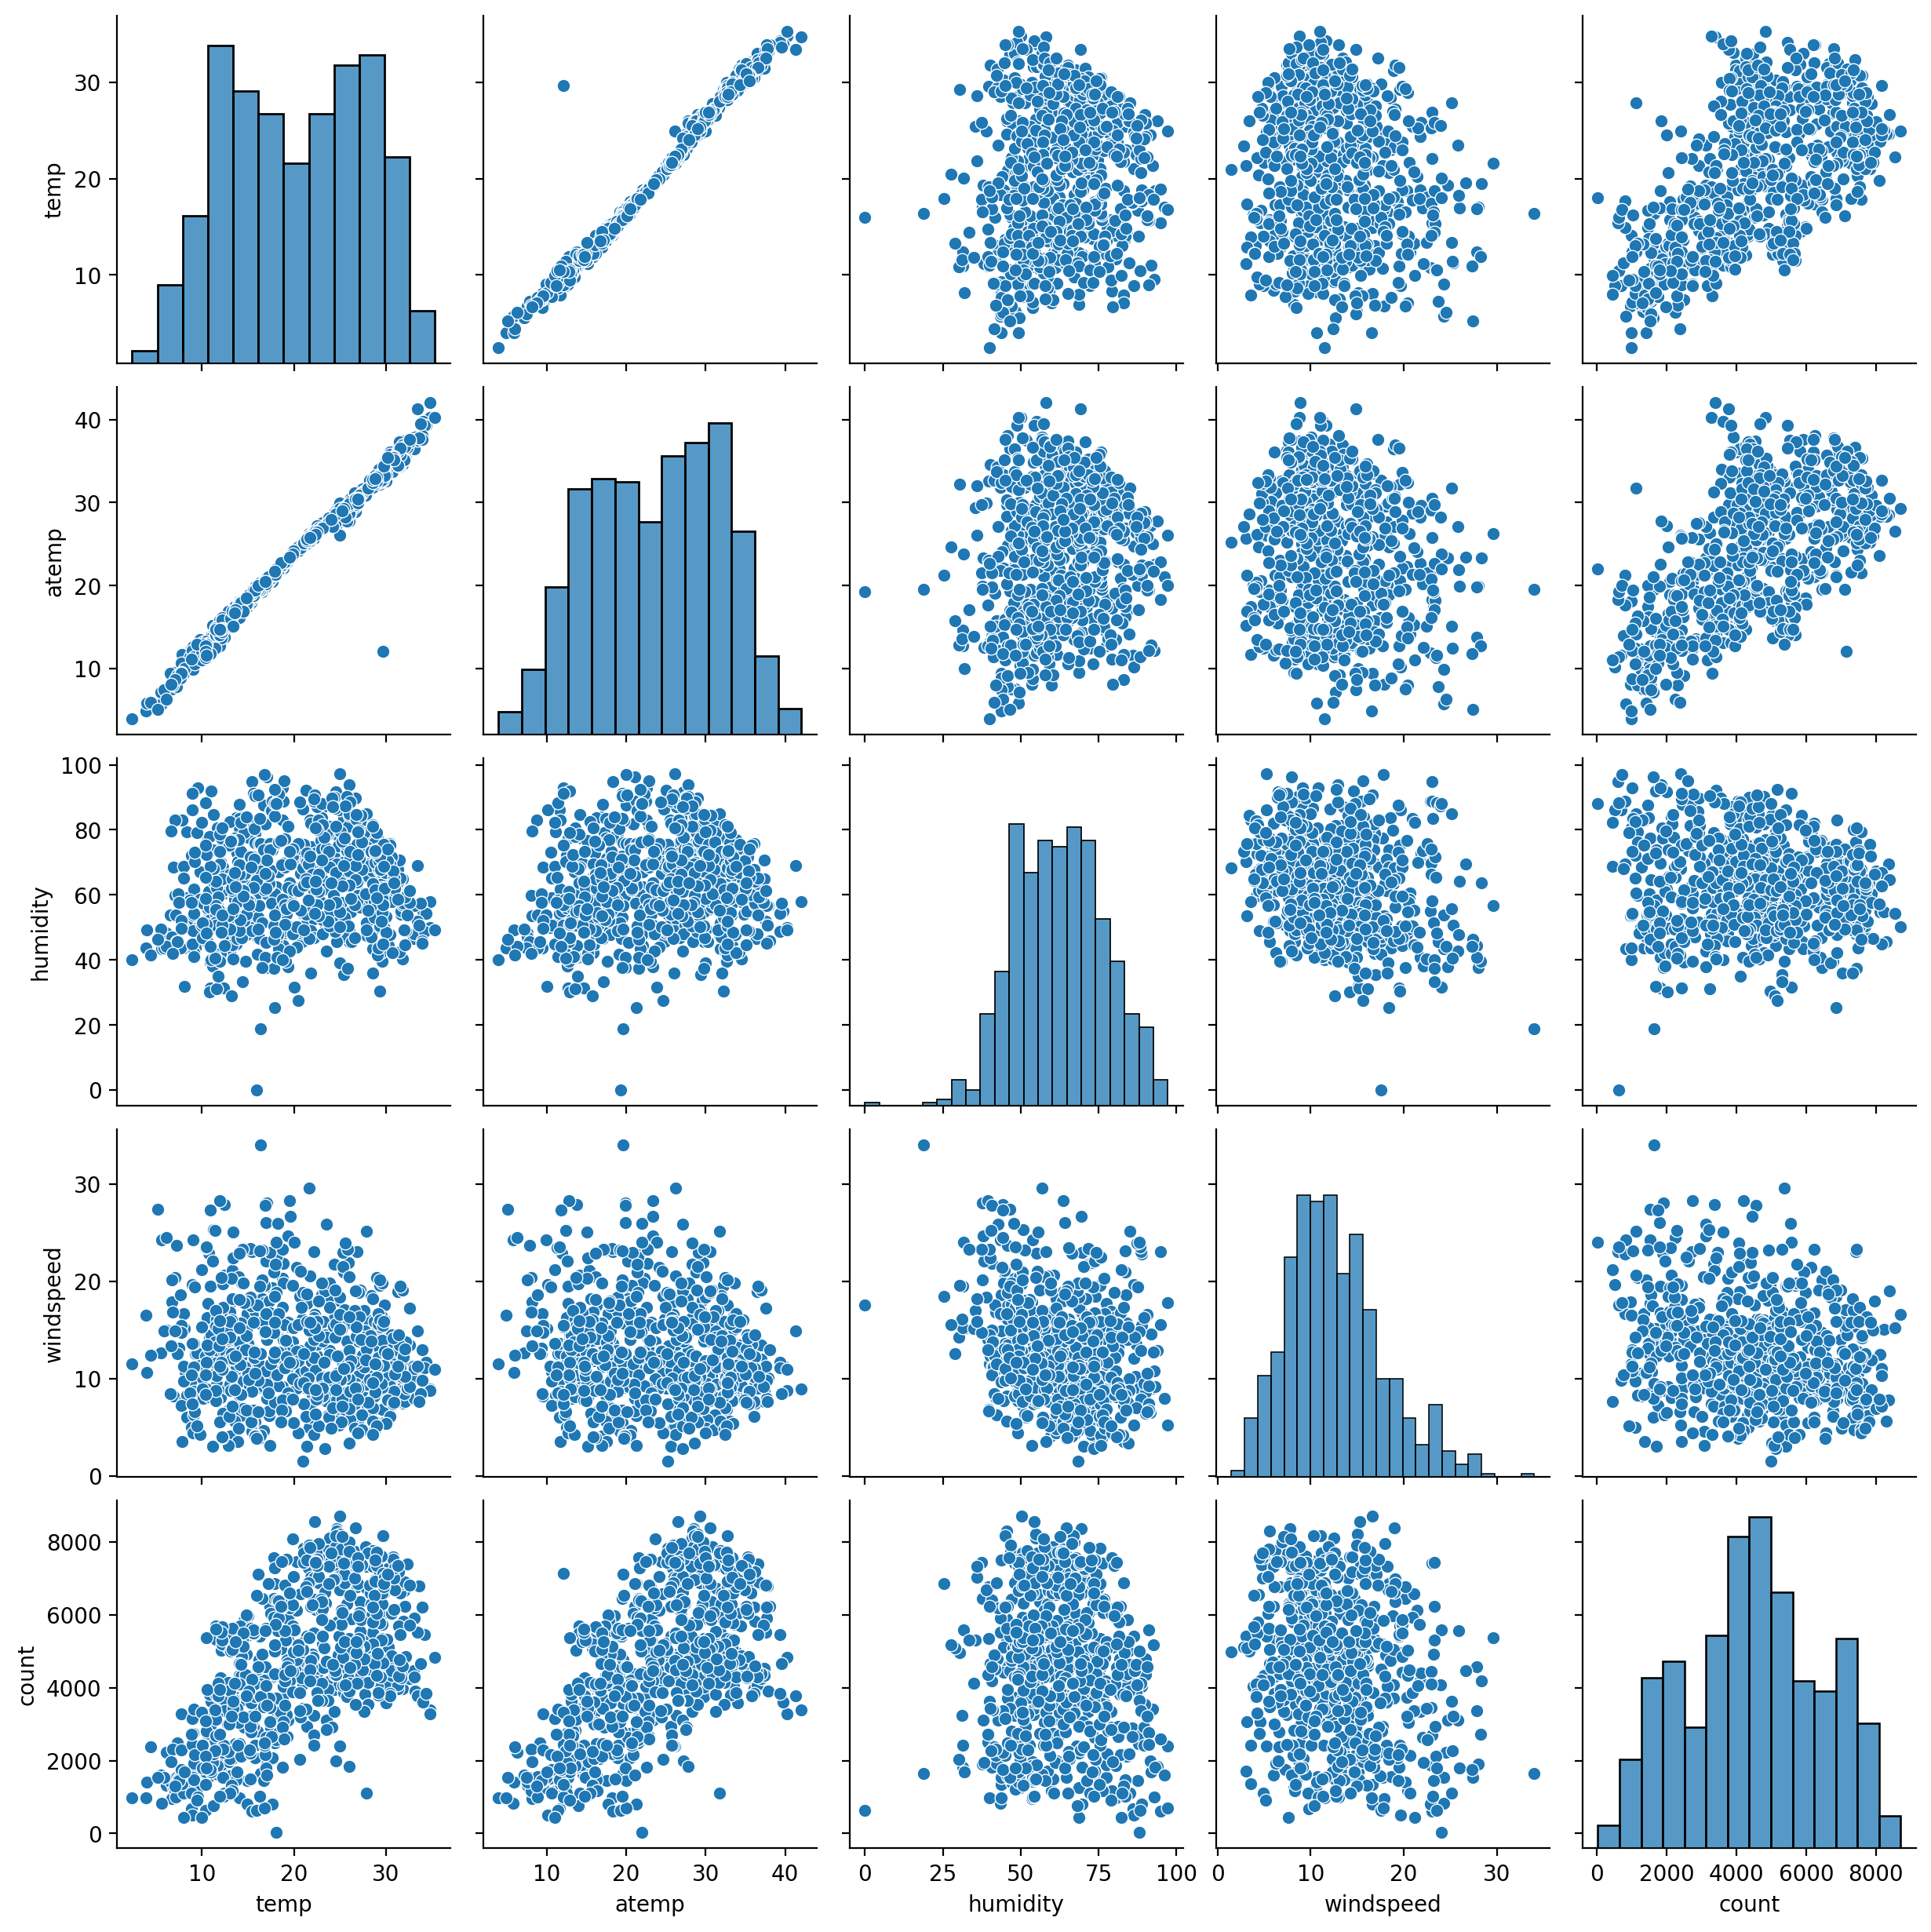

In [23]:
sns.pairplot(bkal)

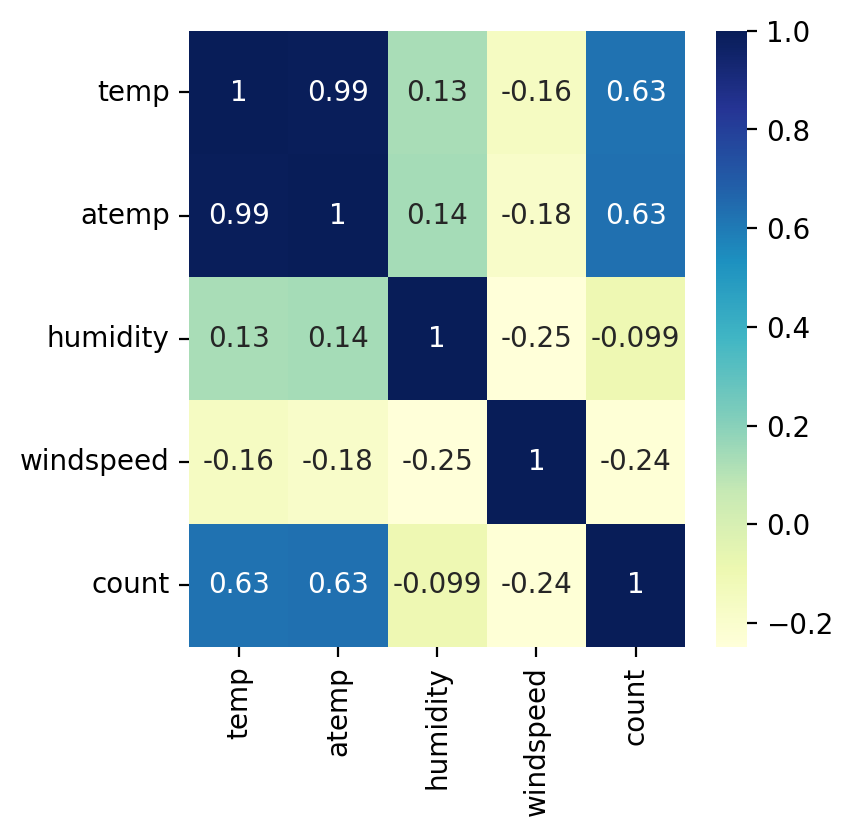

In [24]:
# Let's check the correlation coefficients to see which variables are highly correlated.

df_bkal=bkal[num_vars] 
plt.figure(figsize = [4,4])
sns.heatmap(df_bkal.corr(),annot =True, cmap= 'YlGnBu')
plt.show()

From the pair plots its observed that there is linear relation between temp, atemp and count. Linear regression can be performed on this to derive a conclusive statement

#### Independent variables which could be a good predictor from EDA as indicated above are:

- weather
- temp
- months
- seasons
- workingday
- holiday


## Prepare the Data

In [25]:
# creating a list and putting all category columns in to it and converting them to category data type

for i in cat_vars:
    bk_aldf[i] = bk_aldf[i].astype('category')

In [26]:
# checking converted datatypes
bk_aldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    category
 2   month       730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weather     730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  count       730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


In [27]:
# for Linear model creating dummies
dbk = pd.get_dummies(bk_aldf[cat_vars], drop_first=True)
dbk.head()

season_spring  season_summer  season_winter  year_2019  month_Aug  \
0           True          False          False      False      False   
1           True          False          False      False      False   
2           True          False          False      False      False   
3           True          False          False      False      False   
4           True          False          False      False      False   

   month_Dec  month_Feb  month_Jan  month_July  month_June  ...  holiday_Yes  \
0      False      False       True       False       False  ...        False   
1      False      False       True       False       False  ...        False   
2      False      False       True       False       False  ...        False   
3      False      False       True       False       False  ...        False   
4      False      False       True       False       False  ...        False   

   weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thurs  weekday_Tues  \
0        False        False         True          False         False   
1         True        False        False          False         False   
2        False        False        False          False          True   
3        False        False        False          False         False   
4        False        False        False           True         False   

   weekday_Wed  workingday_Yes  weather_LightRain  weather_Misty  
0        False           False              False           True  
1        False           False              False           True  
2        False            True              False          False  
3         True            True              False          False  
4        False            True              False          False  

[5 rows x 25 columns]

In [28]:
# Combining both the dataframe, bk_aldf and of dummy variables

bike_new = pd.concat([bk_aldf,dbk], axis=1)
bike_new.head()

season  year month holiday weekday workingday weather       temp     atemp  \
0  spring  2018   Jan      No     Sun         No   Misty  14.110847  18.18125   
1  spring  2018   Jan      No     Mon         No   Misty  14.902598  17.68695   
2  spring  2018   Jan      No    Tues        Yes   Clear   8.050924   9.47025   
3  spring  2018   Jan      No     Wed        Yes   Clear   8.200000  10.60610   
4  spring  2018   Jan      No   Thurs        Yes   Clear   9.305237  11.46350   

   humidity  ...  holiday_Yes  weekday_Mon  weekday_Sat  weekday_Sun  \
0   80.5833  ...        False        False        False         True   
1   69.6087  ...        False         True        False        False   
2   43.7273  ...        False        False        False        False   
3   59.0435  ...        False        False        False        False   
4   43.6957  ...        False        False        False        False   

   weekday_Thurs  weekday_Tues  weekday_Wed  workingday_Yes  \
0          False         False        False           False   
1          False         False        False           False   
2          False          True        False            True   
3          False         False         True            True   
4           True         False        False            True   

   weather_LightRain  weather_Misty  
0              False           True  
1              False           True  
2              False          False  
3              False          False  
4              False          False  

[5 rows x 37 columns]

In [29]:
# dropping columns from which dummy varibles were created
bike_new.drop(cat_vars, axis=1, inplace = True)
bike_new.head()

temp     atemp  humidity  windspeed  count  season_spring  \
0  14.110847  18.18125   80.5833  10.749882    985           True   
1  14.902598  17.68695   69.6087  16.652113    801           True   
2   8.050924   9.47025   43.7273  16.636703   1349           True   
3   8.200000  10.60610   59.0435  10.739832   1562           True   
4   9.305237  11.46350   43.6957  12.522300   1600           True   

   season_summer  season_winter  year_2019  month_Aug  ...  holiday_Yes  \
0          False          False      False      False  ...        False   
1          False          False      False      False  ...        False   
2          False          False      False      False  ...        False   
3          False          False      False      False  ...        False   
4          False          False      False      False  ...        False   

   weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thurs  weekday_Tues  \
0        False        False         True          False         False   
1         True        False        False          False         False   
2        False        False        False          False          True   
3        False        False        False          False         False   
4        False        False        False           True         False   

   weekday_Wed  workingday_Yes  weather_LightRain  weather_Misty  
0        False           False              False           True  
1        False           False              False           True  
2        False            True              False          False  
3         True            True              False          False  
4        False            True              False          False  

[5 rows x 30 columns]

In [30]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temp               730 non-null    float64
 1   atemp              730 non-null    float64
 2   humidity           730 non-null    float64
 3   windspeed          730 non-null    float64
 4   count              730 non-null    int64  
 5   season_spring      730 non-null    bool   
 6   season_summer      730 non-null    bool   
 7   season_winter      730 non-null    bool   
 8   year_2019          730 non-null    bool   
 9   month_Aug          730 non-null    bool   
 10  month_Dec          730 non-null    bool   
 11  month_Feb          730 non-null    bool   
 12  month_Jan          730 non-null    bool   
 13  month_July         730 non-null    bool   
 14  month_June         730 non-null    bool   
 15  month_Mar          730 non-null    bool   
 16  month_May          730 non

## Training the Data

In [31]:
# splitting the date into two train and test dataframes

df_train_bk_nw, df_test_bk_nw = train_test_split(bike_new, train_size=0.70, random_state=100)

In [32]:
# verify the columns and rows

print(df_train_bk_nw.shape)
print(df_test_bk_nw.shape)

(510, 30)
(220, 30)


Rescaling the features
- using MinMax Scaler


In [33]:
# defining a variable scaler for minmax scaling
scaler = MinMaxScaler()

In [34]:
bike_new.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'count', 'season_spring',
       'season_summer', 'season_winter', 'year_2019', 'month_Aug', 'month_Dec',
       'month_Feb', 'month_Jan', 'month_July', 'month_June', 'month_Mar',
       'month_May', 'month_Nov', 'month_Oct', 'month_Sept', 'holiday_Yes',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thurs',
       'weekday_Tues', 'weekday_Wed', 'workingday_Yes', 'weather_LightRain',
       'weather_Misty'],
      dtype='object')

In [35]:
# performing scaling on all the numericals variables of train dataset and leaving Count variable aside
num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

df_train_bk_nw[num_vars] = scaler.fit_transform(df_train_bk_nw[num_vars])
df_train_bk_nw[num_vars].head()

temp     atemp  humidity  windspeed     count
576  0.815169  0.766351  0.725633   0.264686  0.827658
426  0.442393  0.438975  0.640189   0.255342  0.465255
728  0.245101  0.200348  0.498067   0.663106  0.204096
482  0.395666  0.391735  0.504508   0.188475  0.482973
111  0.345824  0.318819  0.751824   0.380981  0.191095

In [36]:
# checking all columns and all the variables after scaling
df_train_bk_nw.describe()

temp       atemp    humidity   windspeed       count
count  510.000000  510.000000  510.000000  510.000000  510.000000
mean     0.537440    0.513156    0.650480    0.320883    0.513499
std      0.225858    0.212410    0.145846    0.169803    0.224421
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.339853    0.332086    0.538643    0.199179    0.356420
50%      0.542596    0.529718    0.653714    0.296763    0.518638
75%      0.735215    0.688457    0.754830    0.414447    0.684710
max      1.000000    1.000000    1.000000    1.000000    1.000000

### Model Preperation

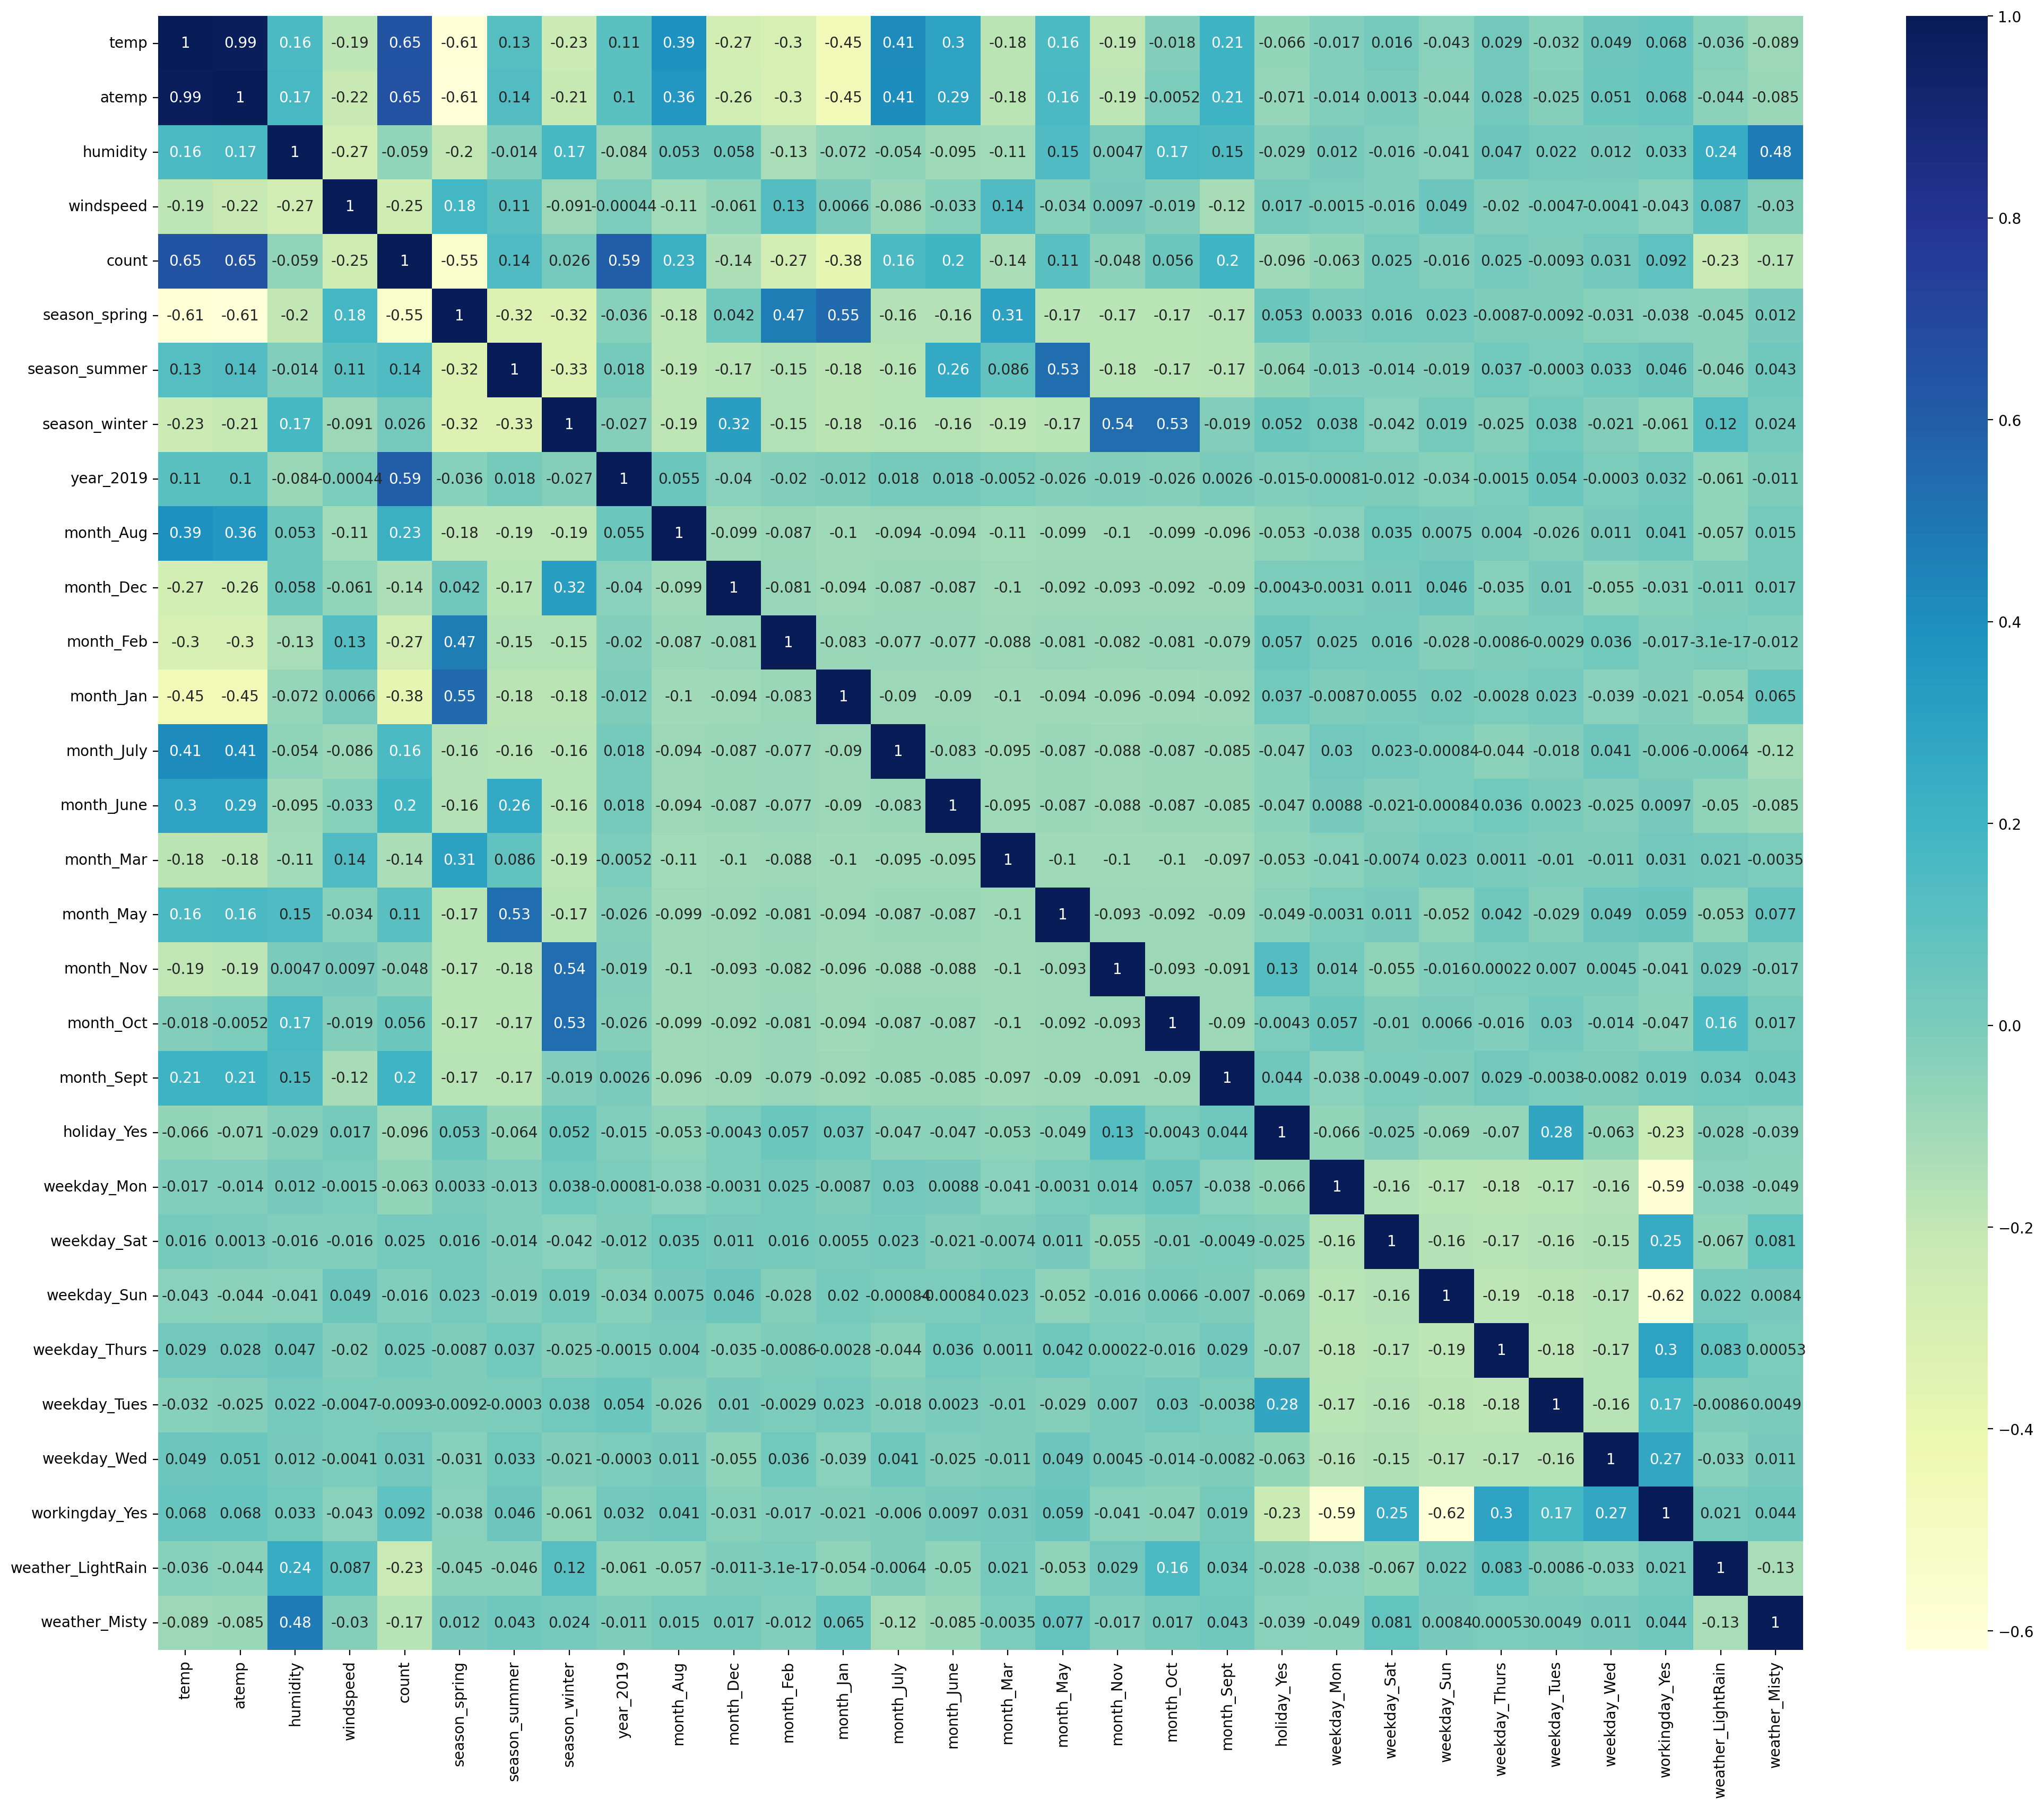

In [37]:
# Checking the correlation coefficients to see which variables are highly correlated in the df.

plt.figure(figsize = [25,20])
sns.heatmap(df_train_bk_nw.corr(),annot =True, cmap= 'YlGnBu')
plt.show()

In [38]:
# Dividing training set into X_train and y_train sets for the model building
y_train = df_train_bk_nw.pop('count')
X_train = df_train_bk_nw

print(y_train.shape)
print(X_train.shape)

(510,)
(510, 29)


In [39]:
# using RFE
ln_mdl = LinearRegression()
ln_mdl.fit(X_train, y_train)

# Run RFE
rfe = RFE(estimator=ln_mdl, n_features_to_select=15) #RFE(ln_mdl, 15)        
rfe = rfe.fit(X_train, y_train)



In [40]:
#creating a list of features selected by RFE
list(zip(X_train, rfe.support_, rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('year_2019', True, 1),
 ('month_Aug', False, 7),
 ('month_Dec', False, 3),
 ('month_Feb', False, 4),
 ('month_Jan', True, 1),
 ('month_July', True, 1),
 ('month_June', False, 13),
 ('month_Mar', False, 15),
 ('month_May', False, 6),
 ('month_Nov', False, 2),
 ('month_Oct', False, 12),
 ('month_Sept', True, 1),
 ('holiday_Yes', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 11),
 ('weekday_Sun', True, 1),
 ('weekday_Thurs', False, 14),
 ('weekday_Tues', False, 9),
 ('weekday_Wed', False, 10),
 ('workingday_Yes', True, 1),
 ('weather_LightRain', True, 1),
 ('weather_Misty', True, 1)]

In [41]:
# Select columns
col = X_train.columns[rfe.support_]
col

Index(['temp', 'humidity', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'year_2019', 'month_Jan', 'month_July', 'month_Sept',
       'holiday_Yes', 'weekday_Sun', 'workingday_Yes', 'weather_LightRain',
       'weather_Misty'],
      dtype='object')

In [42]:
# feature which are not chosen by RFE during feature selection( so un-supported columns)
X_train.columns[~rfe.support_]

Index(['atemp', 'month_Aug', 'month_Dec', 'month_Feb', 'month_June',
       'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'weekday_Mon',
       'weekday_Sat', 'weekday_Thurs', 'weekday_Tues', 'weekday_Wed'],
      dtype='object')

In [43]:
# Creating new train dataframe with RFE selected features
X_train_rfe = X_train[col]
X_train_rfe.head()

temp  humidity  windspeed  season_spring  season_summer  \
576  0.815169  0.725633   0.264686          False          False   
426  0.442393  0.640189   0.255342           True          False   
728  0.245101  0.498067   0.663106           True          False   
482  0.395666  0.504508   0.188475          False           True   
111  0.345824  0.751824   0.380981          False           True   

     season_winter  year_2019  month_Jan  month_July  month_Sept  holiday_Yes  \
576          False       True      False        True       False        False   
426          False       True      False       False       False        False   
728          False       True      False       False       False        False   
482          False       True      False       False       False        False   
111          False      False      False       False       False        False   

     weekday_Sun  workingday_Yes  weather_LightRain  weather_Misty  
576        False            True              False          False  
426         True           False              False           True  
728        False           False              False          False  
482         True           False              False           True  
111        False            True              False           True

In [44]:
def vif_calc(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.astype(float).values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif



In [45]:
# create function for stats linear model 
def sm_linearmodel(X_train_sm):
    #Add constant
    X_train_sm = sm.add_constant(X_train_sm)

    # create a fitted model (1st model)
    lm = sm.OLS(y_train,X_train_sm.astype(float)).fit()
    return lm

## Model Building

In [46]:
# Create 1st stats model and look for summary and VIF
lm_1 = sm_linearmodel(X_train_rfe)
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          4.22e-191
Time:                        23:15:39   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2519      0.03

In [47]:
# Calculate VIF
print(vif_calc(X_train_rfe))

             Features    VIF
1            humidity  29.37
0                temp  17.78
12     workingday_Yes   5.31
2           windspeed   4.73
3       season_spring   4.53
5       season_winter   3.46
4       season_summer   2.85
14      weather_Misty   2.29
6           year_2019   2.09
11        weekday_Sun   1.98
7           month_Jan   1.67
8          month_July   1.59
9          month_Sept   1.39
13  weather_LightRain   1.24
10        holiday_Yes   1.18


##### Observations
- R2 : 0.848 and R2- adj : 0.844. All the variables are having pvalue<0.05. 
- VIF: humidity  is having highest VIF (29.37) which is > 5. We will drop the variable and update the model.

In [48]:
# Dropping humidity as its having highest VIF (29.37) which is > 0.5
X_train_rfe2 = X_train_rfe.drop('humidity', axis = 1)

In [49]:
# Create 2nd stats model and look for summary and VIF
lm_2 = sm_linearmodel(X_train_rfe2)
print(lm_2.summary())
print()
# Calculate VIF
print(vif_calc(X_train_rfe2))

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          1.60e-188
Time:                        23:15:40   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1737      0.03

#### Observations
- R2 : 0.843 and R2- adj : 0.838. All the variables are having pvalue<0.05. 
- VIF: temp is having highest VIF (7.07), but during EDA we could see temp has a high correlation with count and also its a important varible based on business understanding. So we will keep that varible and look for highest variable which is >5.
- We could see workingday_Yes   as next highetst VIF (5.24) which is > 5. We will drop the variable and update the model.


In [50]:
# Dropping workingday_Yes as its having highest VIF (5.24) which is > 5
X_train_rfe3 = X_train_rfe2.drop('workingday_Yes', axis = 1)

In [51]:
# Create 3rd stats model and look for summary and VIF
lm_3 = sm_linearmodel(X_train_rfe3)
print(lm_3.summary())
print()
# Calculate VIF
print(vif_calc(X_train_rfe3))

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          2.48e-186
Time:                        23:15:41   Log-Likelihood:                 502.77
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2120      0.03

 ##### Observations
- R2 : 0.838 and R2- adj : 0.834. 
- pvalue: weekday_Sun  is having pvalue > .05. We will drop the variable and update the model.

In [52]:
# loop to remove the variable with pvalue > .05
pvalue = lm_3.pvalues
while(max(pvalue)>0.05):
    maxp_var = pvalue[pvalue == pvalue.max()].index
    print('Removed variable:' , maxp_var[0], '    P value: ', round(max(pvalue),3))
    
        # drop variable with high p value
    X_train_rfe4 = X_train_rfe3.drop(maxp_var, axis = 1)
    lm_4 = sm_linearmodel(X_train_rfe4)
    pvalue = lm_4.pvalues

Removed variable: weekday_Sun     P value:  0.075


In [53]:
# Create 4th stats model and look for summary and VIF
print(lm_4.summary())
print()
# Calculate VIF
print(vif_calc(X_train_rfe4))

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          8.14e-187
Time:                        23:15:42   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2154      0.03

In [54]:
# Dropping month_Jan as its having pvalue ~0.033 and is having negative correlation with temp
X_train_rfe5 = X_train_rfe4.drop('month_Jan', axis = 1)

In [55]:
# Create 5th stats model and look for summary and VIF
lm_5 = sm_linearmodel(X_train_rfe5)
print(lm_5.summary())
print()
# Calculate VIF
print(vif_calc(X_train_rfe5))

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          5.06e-187
Time:                        23:15:42   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1994      0.03

##### Observations
- R2 : 0.835 and R2- adj : 0.832. All the variables are having pvalue<0.05. 
- VIF:temp is having highest VIF (5.09), but during EDA we could see temp has a high correlation with count and also its a important varible based on business understanding. 
- month_July  is having  high negative correlation . We will drop the variable and update the model.

In [56]:
# Dropping month_July  
X_train_rfe6 = X_train_rfe5.drop('month_July', axis = 1)

In [57]:
# Create 6th stats model and look for summary and VIF
lm_6 = sm_linearmodel(X_train_rfe6)
print(lm_6.summary())
print()
# Calculate VIF
print(vif_calc(X_train_rfe6))

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          1.47e-186
Time:                        23:15:43   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1909      0.03

##### Observations
- R2 : 0.833 and R2- adj : 0.829. All the variables are having pvalue<0.05. 
- VIF also shows all the values < 5

##### The p-values for each predictor appear to be significant, and the model appears to have very low multicollinearity amongst the predictors. As long as the metrics from the test data do not materially differ from this value, we will regard this as our final model .

In [58]:
# List down final model varibales and its coefficients
# assign final model to lm_final
lm_final = lm_6

# list down and check variables of final model
var_final = list(lm_final.params.index)
var_final.remove('const')
print('Final Selected Variables:', var_final)

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm_final.params,3))

Final Selected Variables: ['temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'year_2019', 'month_Sept', 'holiday_Yes', 'weather_LightRain', 'weather_Misty']

Coefficent for the variables are:
const                0.191
temp                 0.478
windspeed           -0.148
season_spring       -0.055
season_summer        0.062
season_winter        0.094
year_2019            0.234
month_Sept           0.091
holiday_Yes         -0.096
weather_LightRain   -0.285
weather_Misty       -0.079
dtype: float64


From the final model equation of  best fitted line is:

- count=0.191+(temp∗0.478)-(windspeed∗0.148)+(season_summer∗0.062)-(0.055×season_spring)+(season_winter∗0.094)+(year_2019∗0.234)+(month_Sept∗0.091)−(holiday_Yes∗0.096)-(weather_LightRain∗0.285)-(weather_Misty∗0.079)


As per  final Model, the below predictor variables influences bike booking :

   - Temperature (temp)
   - Months September
   - Year 
   - Windspeed
   - Seaons Summer, Winter, Spring
   - If its a holiday
   - If the weather is Clear



## Residual Analysis

In [59]:
# Select final variables from the test dataset
X_train_res = X_train[var_final]

In [60]:
#Add constant
X_train_res = sm.add_constant(X_train_res)

In [61]:
# predict train set
y_train_pred = lm_final.predict(X_train_res)

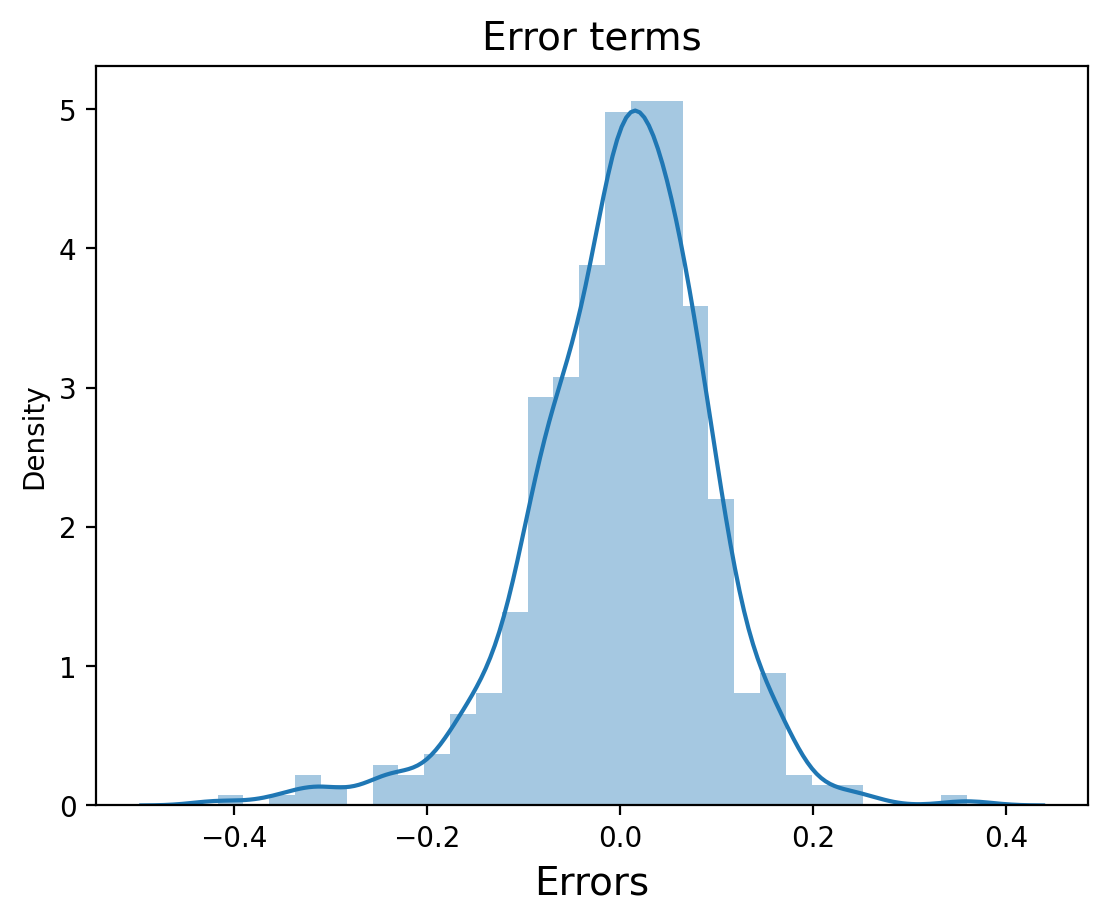

In [62]:
# distrubition plot for residue
res = y_train - y_train_pred
sns.distplot(res)
plt.title('Error terms', fontsize = 14)
plt.xlabel('Errors', fontsize = 14)
plt.show()

#### Observation: 
- From the above histogram, we could see that the Residuals are normally distributed with mean at 0. 

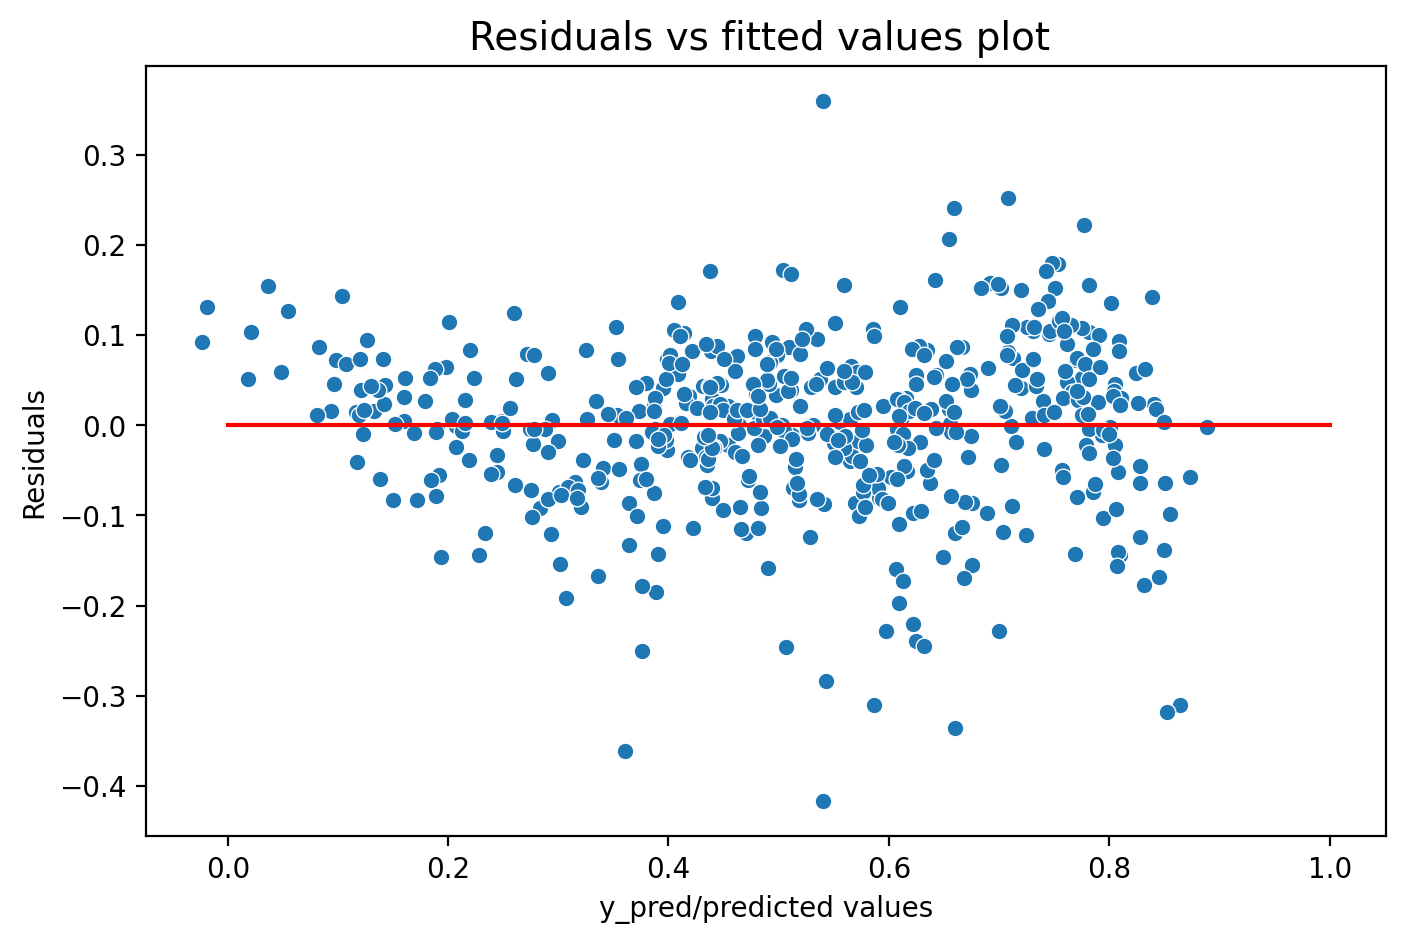

In [63]:
# Check for Homoscedasticity
plt.figure(figsize = [8,5])
p = sns.scatterplot(x=y_train_pred,y=res)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

p = sns.lineplot(x=[0,1],y=[0,0],color='red')
p = plt.title('Residuals vs fitted values plot ', fontsize = 14)

## Evaluation & Prediction 

In [64]:
# Apply scaler() to all numeric variables in test dataset. 

df_test_bk_nw[num_vars] = scaler.transform(df_test_bk_nw[num_vars])
df_test_bk_nw.head()

temp     atemp  humidity  windspeed     count  season_spring  \
184  0.831783  0.769660  0.657364   0.084219  0.692706          False   
535  0.901354  0.842587  0.610133   0.153728  0.712034          False   
299  0.511964  0.496145  0.837699   0.334206  0.303382          False   
221  0.881625  0.795343  0.437098   0.339570  0.547400          False   
152  0.817246  0.741471  0.314298   0.537414  0.569029          False   

     season_summer  season_winter  year_2019  month_Aug  ...  holiday_Yes  \
184          False          False      False      False  ...         True   
535           True          False       True      False  ...        False   
299          False           True      False      False  ...        False   
221          False          False      False       True  ...        False   
152           True          False      False      False  ...        False   

     weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thurs  weekday_Tues  \
184        False        False        False          False          True   
535        False        False        False           True         False   
299        False        False        False          False         False   
221        False        False        False           True         False   
152        False        False        False          False         False   

     weekday_Wed  workingday_Yes  weather_LightRain  weather_Misty  
184        False           False              False           True  
535        False            True              False          False  
299        False            True              False           True  
221        False            True              False          False  
152        False            True              False          False  

[5 rows x 30 columns]

In [65]:
# variables after scaling the test data
df_test_bk_nw.describe()

temp       atemp    humidity   windspeed       count
count  220.000000  220.000000  220.000000  220.000000  220.000000
mean     0.558718    0.532847    0.638221    0.313293    0.522154
std      0.233187    0.217401    0.148694    0.159584    0.219163
min      0.046591    0.025950    0.261915   -0.042808    0.048205
25%      0.355429    0.344870    0.529197    0.198843    0.378595
50%      0.558172    0.544652    0.625590    0.300126    0.524678
75%      0.755981    0.713308    0.743798    0.402718    0.677750
max      0.984424    0.980934    1.002146    0.807474    0.963300

### Final Model Building

In [66]:
# Dividing test set into X_test and y_test sets for the model building

y_test = df_test_bk_nw.pop('count')
X_test = df_test_bk_nw

print(y_test.shape)
print(X_test.shape)

(220,)
(220, 29)


In [67]:
#Selecting the variables that were part of final model (Model 6).
col_test = X_train_rfe6.columns

X_test = X_test[col_test]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)

X_test_lm6.head()

const      temp  windspeed  season_spring  season_summer  season_winter  \
184    1.0  0.831783   0.084219          False          False          False   
535    1.0  0.901354   0.153728          False           True          False   
299    1.0  0.511964   0.334206          False          False           True   
221    1.0  0.881625   0.339570          False          False          False   
152    1.0  0.817246   0.537414          False           True          False   

     year_2019  month_Sept  holiday_Yes  weather_LightRain  weather_Misty  
184      False       False         True              False           True  
535       True       False        False              False          False  
299      False       False        False              False           True  
221      False       False        False              False          False  
152      False       False        False              False          False

In [68]:
# Making predictions using the final model (lm_6)

y_test_pred = lm_final.predict(X_test_lm6)

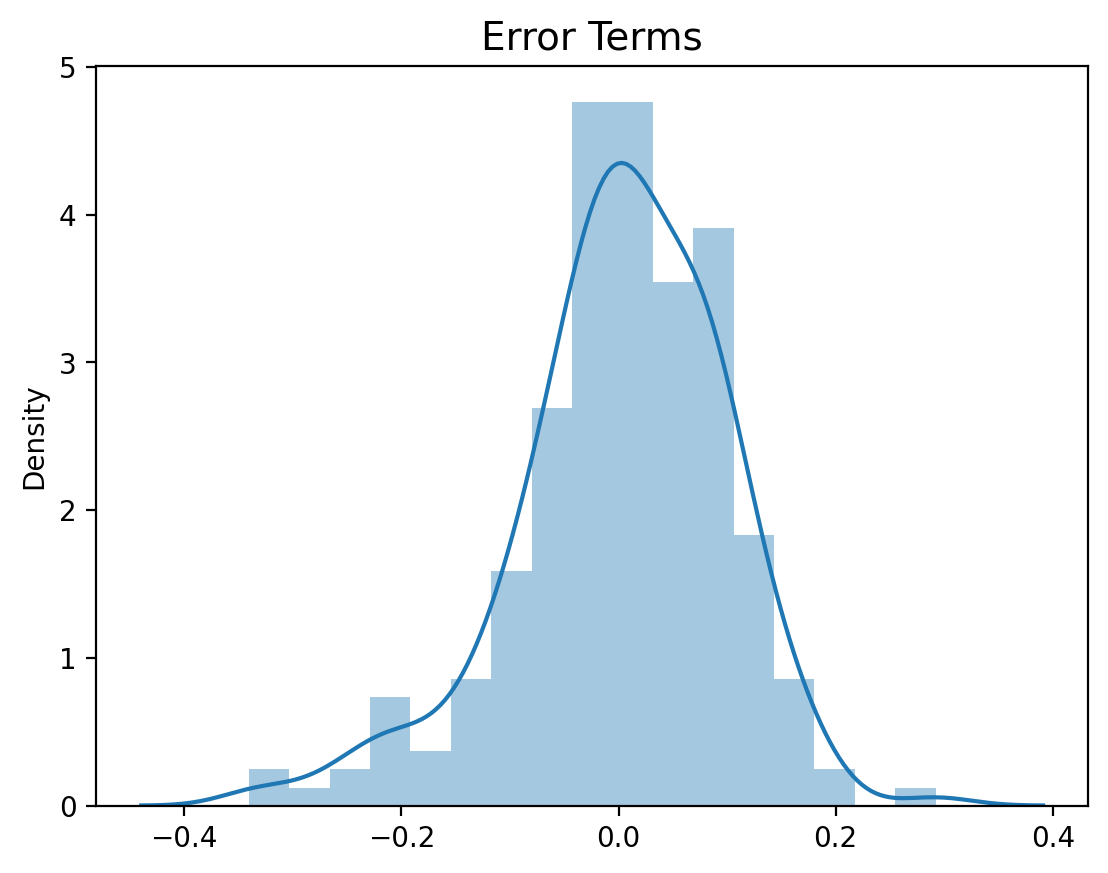

In [69]:
res_test = y_test - y_test_pred
plt.title('Error Terms', fontsize=14) 
sns.distplot(res_test)
plt.show()

- The distribution plot of error term shows the normal distribution with mean at Zero.


## Conclusion

Text(0, 0.5, 'y_test_pred')

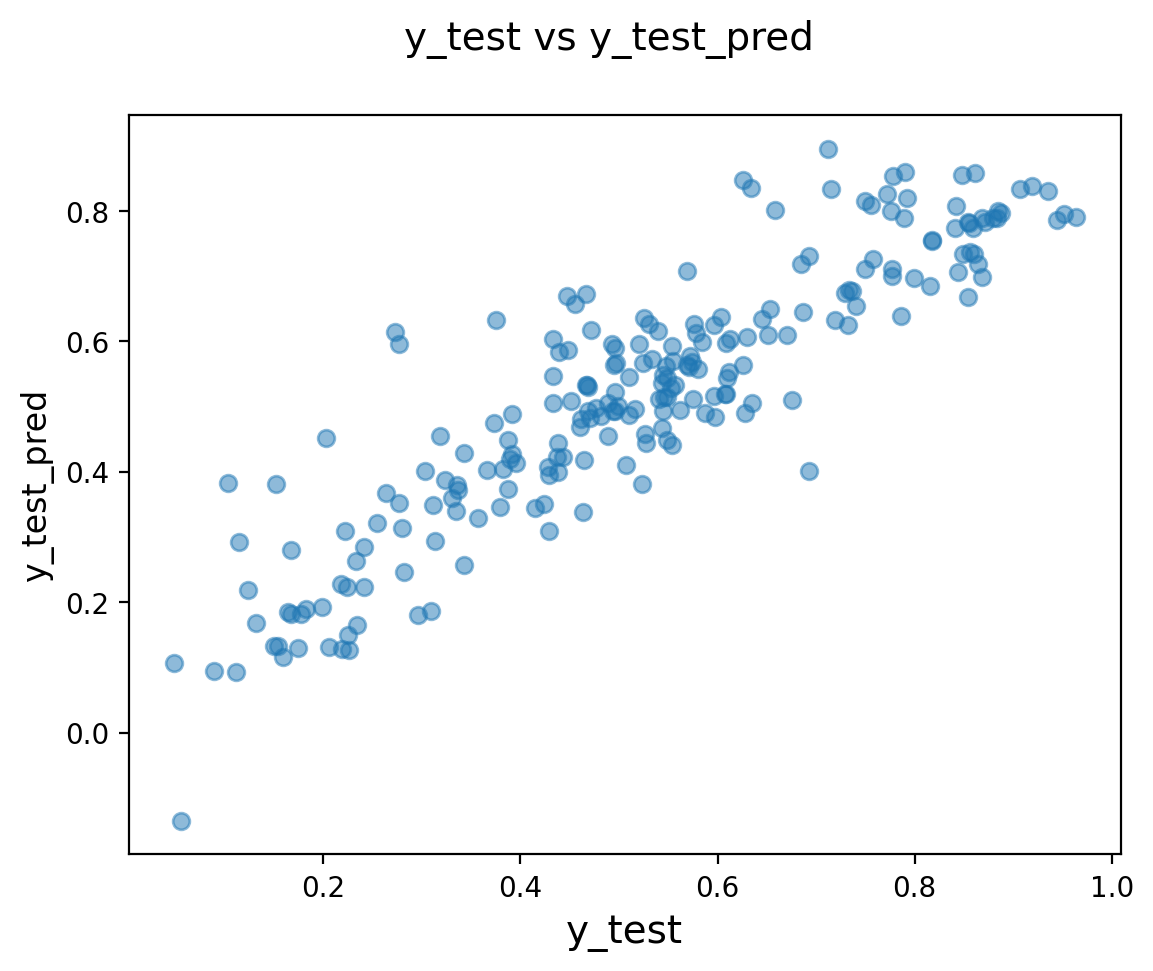

In [70]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 14)       
plt.xlabel('y_test', fontsize = 14)             
plt.ylabel('y_test_pred', fontsize = 12) 

- We can conclude that the model lm_6 fit is not by chance, and has descent predictive power.

In [71]:

r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test data R-Squared :',round((r2_test*100),2))
print('Train data R-Squared :',round((r2_train*100),2))

Test data R-Squared : 80.38
Train data R-Squared : 83.27


In [72]:
# n for test data ,n1 for train data is number of rows
n = X_test.shape[0]
n1 = X_train_rfe6.shape[0]

# Number of features (predictors, p for test data, p1 for train data) is the number of columns
p = X_test.shape[1]
p1 = X_train_rfe6.shape[1]


# We find the Adjusted R-squared using the formula

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_train = 1-(1-r2_train)*(n1-1)/(n1-p1-1)

print('Test data adjusted R-Squared :',round((adjusted_r2_test*100),2))
print('Train data adjusted R-Squared :',round((adjusted_r2_train*100),2))

Test data adjusted R-Squared : 79.44
Train data adjusted R-Squared : 82.94


In [73]:
from sklearn.metrics import r2_score, mean_squared_error

# Mean Sqare Error
mse = mean_squared_error(y_test, y_test_pred)
print('Mean_Squared_Error :' ,round(mse,4))


Mean_Squared_Error : 0.0094


In [74]:
#Using mean_squared_error from scikit-learn and sqrt from nummpy, calculate the RMSE.

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('Root_Mean_Squared_Error :' ,round(rmse,4))


Root_Mean_Squared_Error : 0.0969


- Based on the R-Squared and adj R-Squared values of the train and test datasets, we may deduce that the variables mentioned above account for about 80% of the demand for bicycles.

 - The variables' coefficients explain the factors influencing the demand for bikes.
 - According to the final model, the below predictor variables influences bike booking :
    - Temperature (temp)
    - Months September
    - Year 
    - Seasons Summer, Winter, 
    - Windspeed
    - Seasons Spring
    - If its a holiday
    - If the weather is Clear
 

  In order to maximize demand, it is advised that these aspects be given the utmost consideration throughout planning.


